# ANALISIS EXPLORATORIO DE DATOS COMPARATIVO

## Lectura de datos

In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Lectura de dataframes
df = pd.read_csv('../data/dataframe_clean.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])
df_edit = pd.read_csv('../data_edit/dataframe_edit_clean.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])

## Estructura de los datos

Se hará una comparación entre las informaciones de cada dataframe

In [3]:
# Estructura del dataframe sin relleno de datos
df.shape

(87648, 18)

In [4]:
# Estructura del dataframe con relleno de datos
df_edit.shape

(87648, 18)

In [5]:
# Cantidad de datos no nulos iniciales por variable en el dataframe sin relleno de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     87648 non-null  datetime64[ns]
 1   HORA                      87648 non-null  int64         
 2   CAUDAL                    87380 non-null  float64       
 3   CAL_1RIA_KG               29 non-null     float64       
 4   CAL_1RIA_DOSIS            587 non-null    float64       
 5   AGUA_CRUDA_P.H            86723 non-null  float64       
 6   AGUA_CRUDA_COLOR          81227 non-null  float64       
 7   AGUA_CRUDA_NTU            86984 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    68372 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60089 non-null  float64       
 10  COAGULANTE_GRANULADO      5897 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  

In [6]:
# Cantidad de datos no nulos iniciales por variable en el dataframe con relleno de datos
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     87648 non-null  datetime64[ns]
 1   HORA                      87648 non-null  int64         
 2   CAUDAL                    87385 non-null  float64       
 3   CAL_1RIA_KG               29 non-null     float64       
 4   CAL_1RIA_DOSIS            587 non-null    float64       
 5   AGUA_CRUDA_P.H            86915 non-null  float64       
 6   AGUA_CRUDA_COLOR          81508 non-null  float64       
 7   AGUA_CRUDA_NTU            87154 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    68682 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60092 non-null  float64       
 10  COAGULANTE_GRANULADO      5900 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  

Antes de llevar a cabo el proceso de llenado de datos siguiendo las directrices establecidas por el ingeniero Mauricio, el dataframe mostraba únicamente 44,393 valores no nulos para la dosis de coagulante. Sin embargo, tras completar dicho proceso, se obtuvieron 81,480 registros no nulos de dosis de coagulante. Esta cantidad resulta adecuada para continuar con el procesamiento y modelado de los datos.

## Análisis de datos faltantes

El primer análisis que se hará es el de datos faltantes o nulos, este análisis se realiza con el objetivo de revisar cual es la cantidad de datos válidos con los que se cuenta y visualizar tambien los tramos donde los datos son muy escasos.

**Tabla de porcentajes de datos nulos**

In [7]:
def nulos_perc(df):
    nulos=pd.DataFrame()
    nulos['% de nulos'] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
    nulos['N de nulos'] = df.isnull().sum().sort_values(ascending = False)
    nulos['N de NO nulos'] = df.notnull().sum().sort_values(ascending = False)
    nulos.index.name = 'Variables'
    nulos=nulos.reset_index()
    return nulos

In [8]:
nulos = nulos_perc(df)
nulos_edit =nulos_perc(df_edit)
print('Datos nulos sin rellenado:\n', nulos, '\n\n', 'Datos nulos con rellenado:\n', nulos_edit)

Datos nulos sin rellenado:
                    Variables  % de nulos  N de nulos  N de NO nulos
0                CAL_1RIA_KG   99.966913       87619             29
1         COAGULANTE_LIQUIDO   99.845975       87513            135
2             CAL_1RIA_DOSIS   99.330276       87061            587
3       COAGULANTE_GRANULADO   93.271951       81751           5897
4   AGUA_TRATADA_ALCALINIDAD   58.748631       51492          36156
5           COAGULANTE_DOSIS   49.350812       43255          44393
6   AGUA_CRUDA_CONDUCTIVIDAD   31.442817       27559          60089
7     AGUA_CRUDA_ALCALINIDAD   21.992516       19276          68372
8         AGUA_TRATADA_CLORO   11.812021       10353          77295
9         AGUA_TRATADA_COLOR   10.401835        9117          78531
10          AGUA_CRUDA_COLOR    7.325894        6421          81227
11          AGUA_TRATADA_P.H    3.470701        3042          84606
12          AGUA_TRATADA_NTU    3.282448        2877          84771
13            AGUA_C

Al examinar estas tablas, se puede observar una reducción significativa en el porcentaje de valores nulos, aproximadamente del 42%, en la variable `COAGULANTE_DOSIS`, la cual es nuestra variable objetivo de estudio.

**Distribución de datos nulos en todo el dataframe**

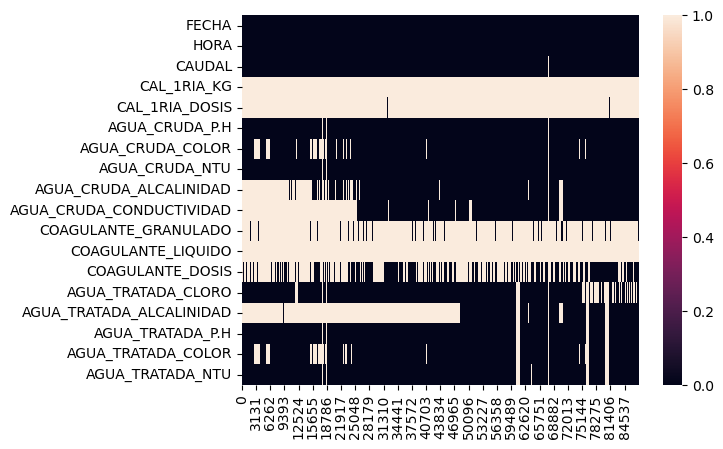

In [9]:
# Datos nulos sin rellenado
df.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

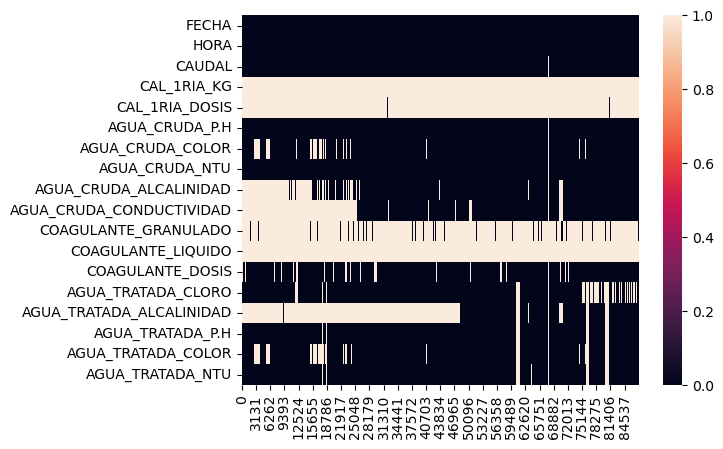

In [10]:
# Datos nulos con rellenado
df_edit.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

Se realizó una observación de la cantidad de datos nulos de las variables en cada registro. Se encontró que en los primeros 50000 registros no se reportaron valores para la alcalinidad de agua tratada. Además, en los primeros 25000 registros, la información sobre la conductividad y la alcalinidad de agua cruda es escasa.

### Número de datos nulos por año

In [11]:
def nulos_año(df):
    CONTEO_NULOS_AÑO = df.groupby(df['FECHA'].dt.year).apply(lambda x: x.isnull().sum())
    print(CONTEO_NULOS_AÑO)
    # Gráfica de datos nulos por año
    nrows = 4
    ncols = 3
    num_subplots = len(CONTEO_NULOS_AÑO)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5))

    for i, año in enumerate(CONTEO_NULOS_AÑO.index):
        row = i // ncols
        col = i % ncols

        # Acceder al eje correspondiente
        ax = axes[col] if nrows == 1 else axes[row, col]

        ax.bar(CONTEO_NULOS_AÑO.columns, CONTEO_NULOS_AÑO.loc[año])
        ax.set_title(f'Valores nulos por variable en {año}')
        ax.set_xlabel('Variable')
        ax.set_ylabel('Número de valores nulos')
        ax.tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

       FECHA  HORA  CAUDAL  CAL_1RIA_KG  CAL_1RIA_DOSIS  AGUA_CRUDA_P.H  \
FECHA                                                                     
2013       0     0      11         8760            8760              51   
2014       0     0       4         8760            8752             114   
2015       0     0       0         8759            8736             190   
2016       0     0       2         8779            8738              45   
2017       0     0      41         8760            8760              90   
2018       0     0      13         8759            8760              11   
2019       0     0      14         8760            8760             211   
2020       0     0     182         8784            8784             186   
2021       0     0       1         8742            8403               4   
2022       0     0       0         8756            8608              23   

       AGUA_CRUDA_COLOR  AGUA_CRUDA_NTU  AGUA_CRUDA_ALCALINIDAD  \
FECHA                           

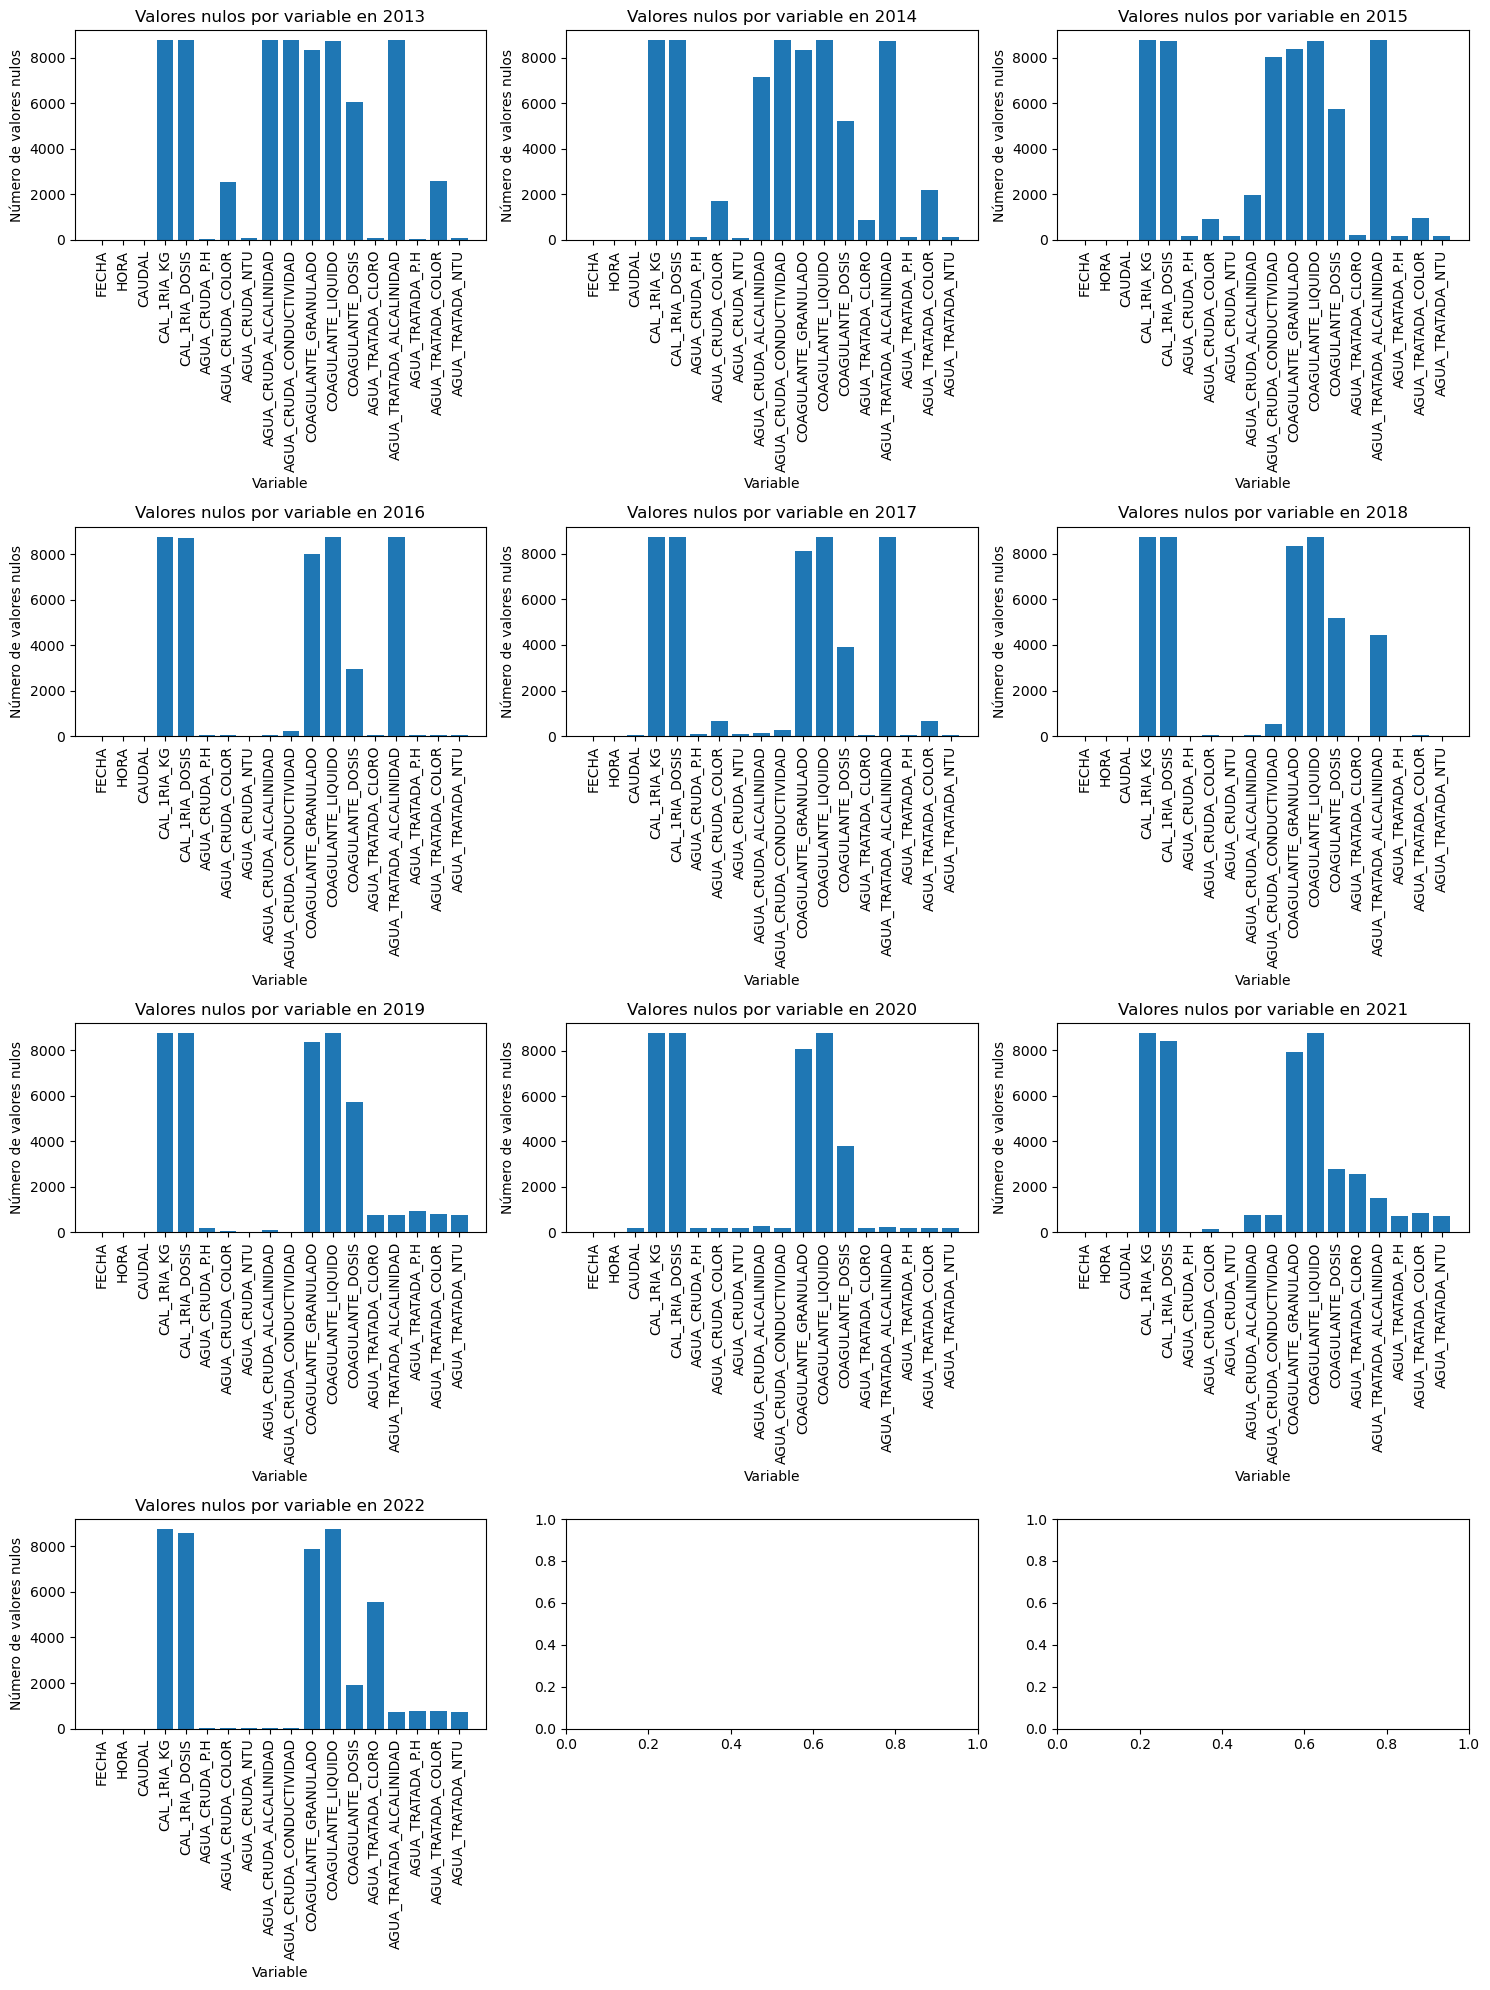

In [12]:
nulos_año(df)

Al examinar la cantidad de datos faltantes en la variable objetivo (COAGULANTE_DOSIS), con aproximadamente 8760 datos por año, se observa que los años 2016, 2020, 2021 y 2022 presentan la menor cantidad de datos nulos. A pesar de esto, es evidente que la proporción de datos faltantes en la variable sigue siendo considerable.

       FECHA  HORA  CAUDAL  CAL_1RIA_KG  CAL_1RIA_DOSIS  AGUA_CRUDA_P.H  \
FECHA                                                                     
2013       0     0       9         8760            8760              36   
2014       0     0       4         8760            8752              41   
2015       0     0       0         8759            8736              90   
2016       0     0       2         8779            8738              44   
2017       0     0      38         8760            8760              87   
2018       0     0      13         8759            8760              11   
2019       0     0      14         8760            8760             211   
2020       0     0     182         8784            8784             186   
2021       0     0       1         8742            8403               4   
2022       0     0       0         8756            8608              23   

       AGUA_CRUDA_COLOR  AGUA_CRUDA_NTU  AGUA_CRUDA_ALCALINIDAD  \
FECHA                           

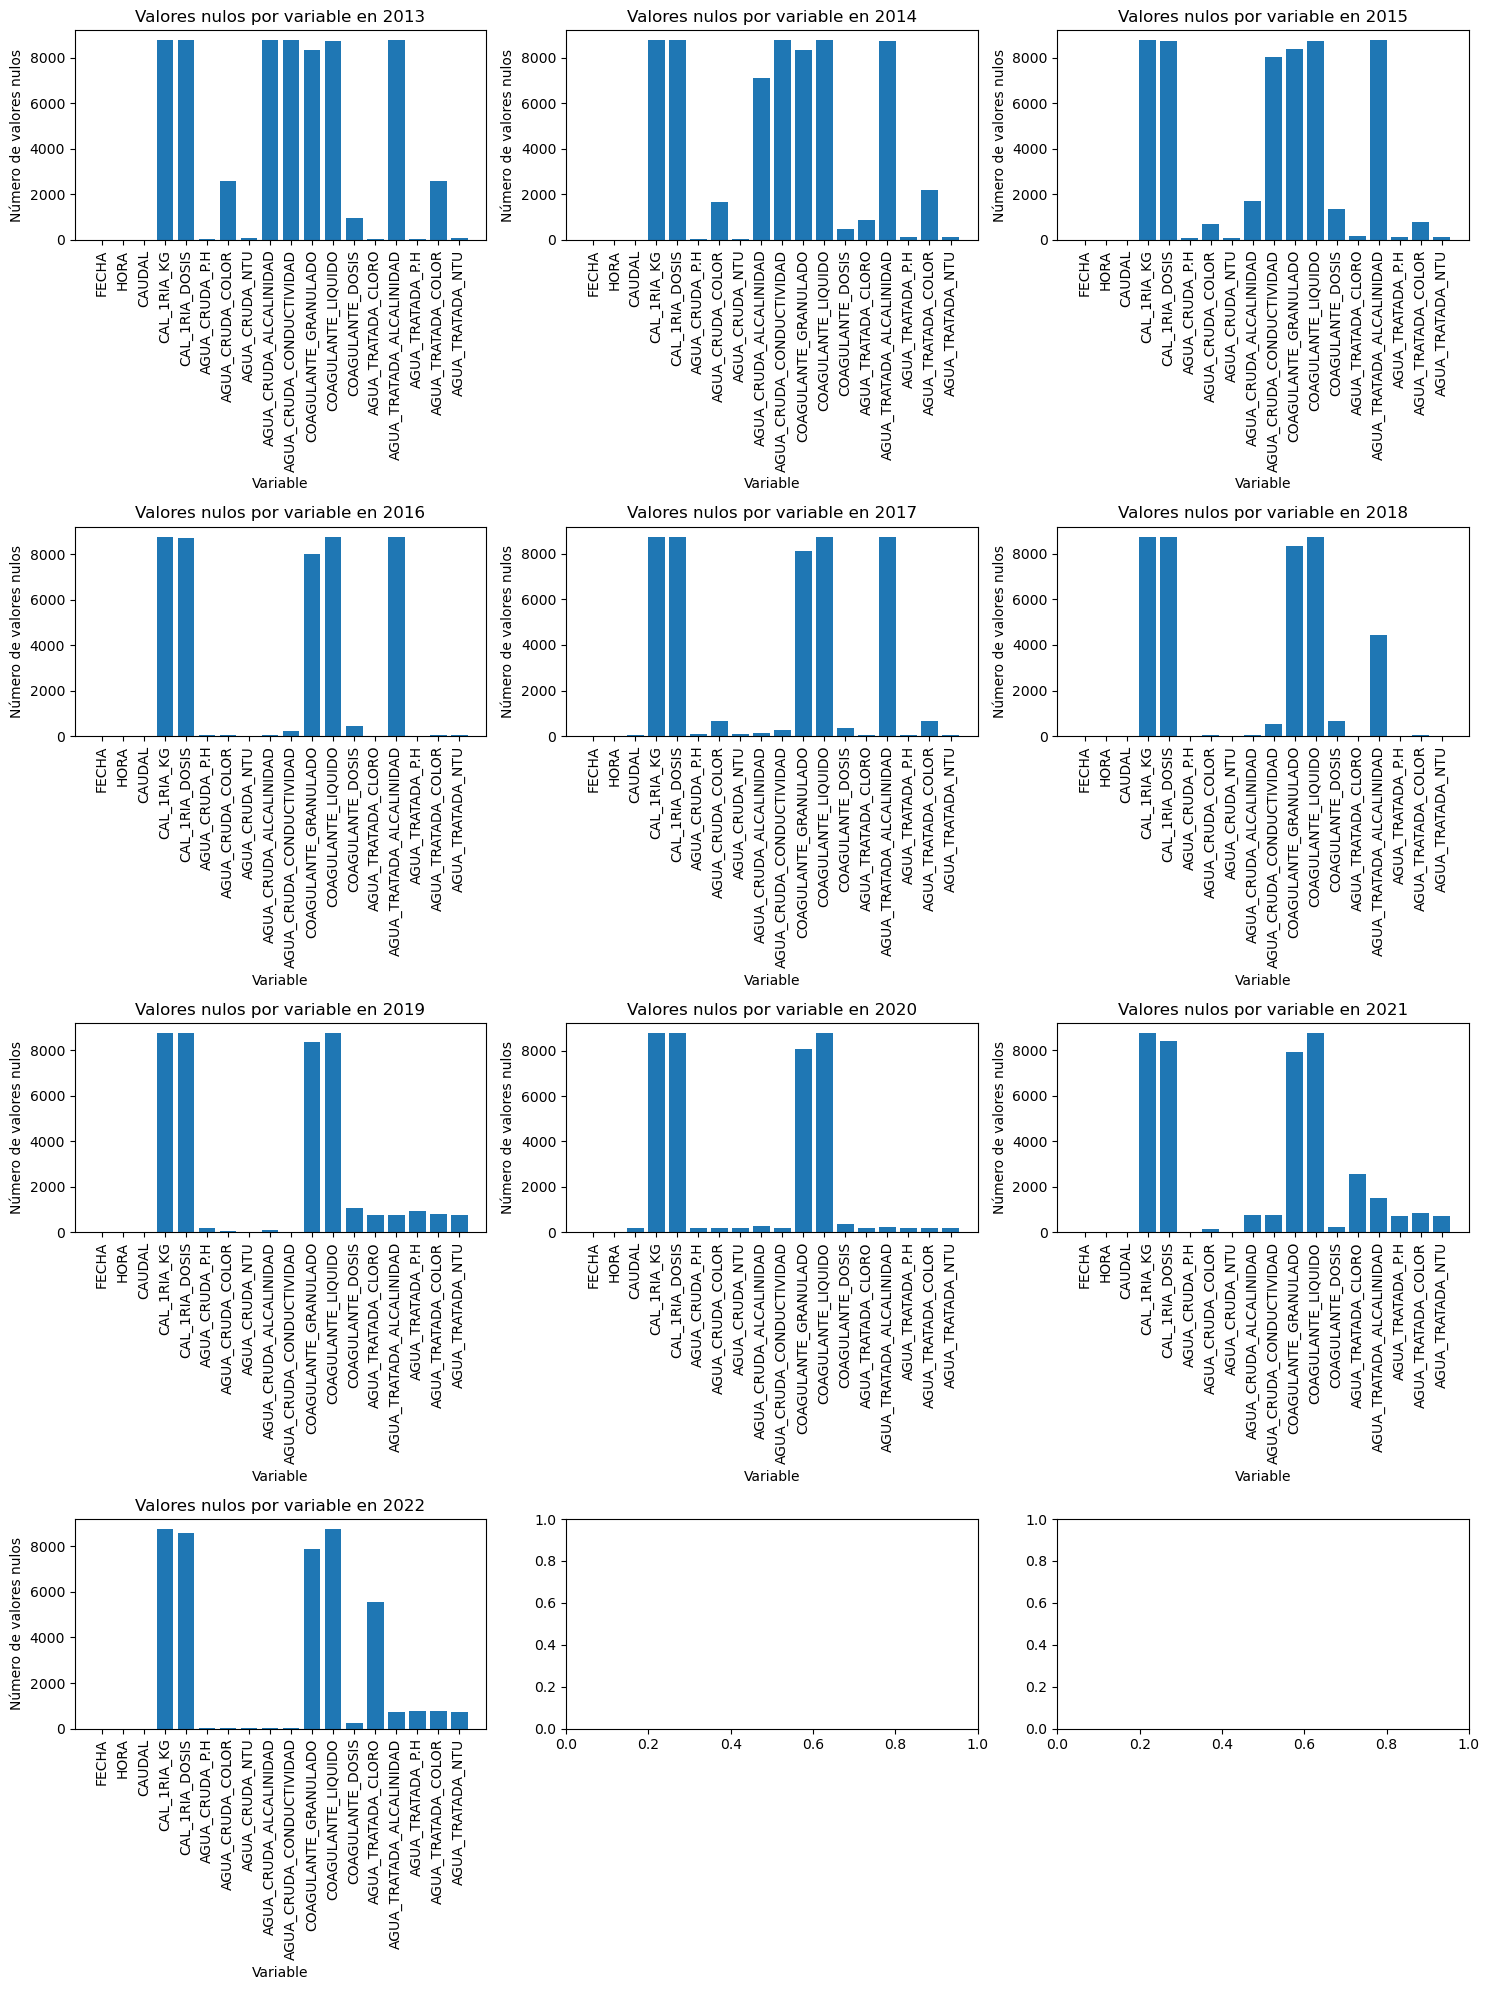

In [13]:
nulos_año(df_edit)

Al analizar las dos tablas de resultado, observamos notables diferencias en la variable objetivo `COAGULANTE_DOSIS`, entre los dataframes que presentan y no presentan relleno de datos, respectivamente.

Para el primer dataframe, donde los datos no han sido rellenados, la cantidad de datos nulos en la variable `COAGULANTE_DOSIS` varía entre 1911 y 6032 a lo largo de los años. En este caso, se aprecia una disminución general de los datos nulos en la variable `COAGULANTE_DOSIS`, sugiriendo una posible mejora en la recopilación o el registro de estos datos con el tiempo.

En contraste, en el segundo dataframe, donde los datos han sido rellenados, la cantidad de datos nulos en `COAGULANTE_DOSIS` disminuye drásticamente, oscilando entre 235 y 1364. Esto indica que la implementación del relleno de datos ha sido exitosa en la reducción de la cantidad de datos nulos en la variable objetivo.

### Linea de tiempo

In [14]:
def plot_timeline(df, date_column, value_column, start_year, end_year):
    # Filtrar el DataFrame por el rango de años especificado
    filtered_df = df[(df[date_column].dt.year >= start_year) & (df[date_column].dt.year <= end_year)]
    
    # Graficar la línea de tiempo para el rango de años especificado
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df[date_column], filtered_df[value_column])
    plt.xlabel('Fecha')
    plt.ylabel('Dosis de coagulante')
    plt.title(f'Línea de tiempo de {start_year} a {end_year}')
    plt.show()

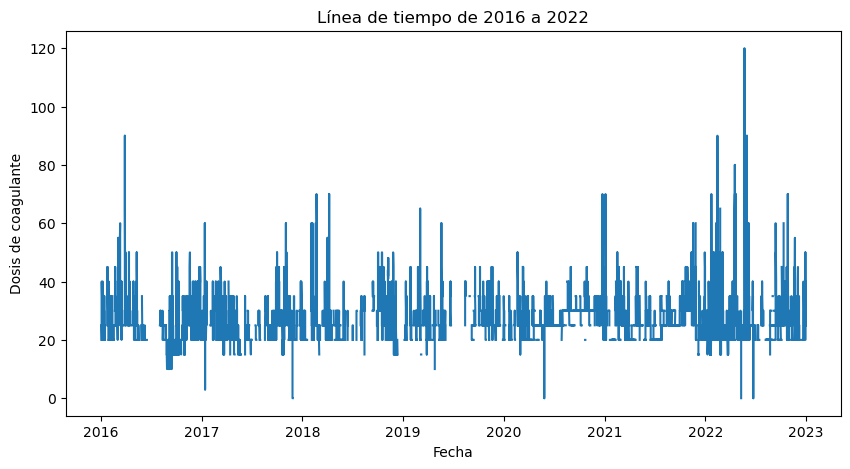

In [15]:
plot_timeline(df, 'FECHA', 'COAGULANTE_DOSIS', 2016, 2022)

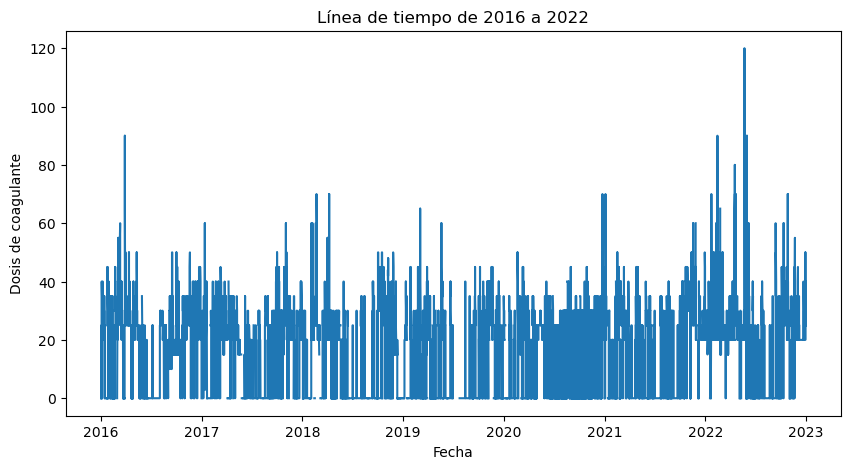

In [16]:
plot_timeline(df_edit, 'FECHA', 'COAGULANTE_DOSIS', 2016, 2022)

Esta línea de tiempo representa las variaciones en la dosis de coagulante a lo largo de los años, resaltando en qué periodos se ubican los valores máximos y mínimos. Además, facilita la visualización de la distribución de datos faltantes a través del tiempo. Es posible apreciar el cambio en las dos líneas, donde la línea correspondiente a los datos rellenados convierte la mayoría de los valores NaN presentes en la línea de datos no rellenados a cero.

## Análisis de variables

### 1. Análisis Univariable (COAGULANTE_DOSIS)

In [17]:
# Resumen de estadística descriptiva de dataframe no rellena:
df['COAGULANTE_DOSIS'].describe()

count    44393.00000
mean        26.01962
std          6.71821
min          0.00000
25%         20.00000
50%         25.00000
75%         30.00000
max        120.00000
Name: COAGULANTE_DOSIS, dtype: float64

In [18]:
# Resumen de estadística descriptiva de dataframe rellena:
df_edit['COAGULANTE_DOSIS'].describe()

count    81480.000000
mean        14.215832
std         13.848115
min          0.000000
25%          0.000000
50%         20.000000
75%         25.000000
max        120.000000
Name: COAGULANTE_DOSIS, dtype: float64

A partir de los resultados comparativos entre los datos sin rellenar y los datos rellenados, se pueden analizar las siguientes observaciones:

La cantidad de datos en la columna `COAGULANTE_DOSIS` aumentó significativamente después del relleno, pasando de 44,393 a 81,480 registros.
La media de la dosis de coagulante disminuyó de 26.02 a 14.22 después del relleno. Esto indica que los valores rellenados podrían tener una tendencia a ser más bajos que los valores originales.
La desviación estándar aumentó de 6.72 a 13.85, lo que sugiere que la dispersión de los datos en la columna `COAGULANTE_DOSIS` es mayor después del relleno.
Los valores mínimos y máximos de la dosis de coagulante se mantuvieron constantes (0 y 120, respectivamente) en ambos conjuntos de datos.
Los percentiles 25%, 50% y 75% mostraron cambios notables después del relleno. El percentil 25% disminuyó a 0, lo que implica que al menos el 25% de los datos rellenados tienen un valor de 0 para la dosis de coagulante. El percentil 50% pasó de 25 a 20, mientras que el percentil 75% se redujo ligeramente a 25.
En resumen, el relleno de datos ha aumentado significativamente la cantidad de registros en la columna `COAGULANTE_DOSIS`, pero también ha introducido cambios en la distribución de los valores, como una disminución en la media y una mayor dispersión. Por consiguiente, se procede con la visualización de la distribución de los datos, donde se podrá ver de forma más clara esa estadística descriptiva.

In [19]:
def distribution(df):
    # Configurar Seaborn
    sns.set(style="whitegrid")
    # Crear displot
    ax = sns.displot(df['COAGULANTE_DOSIS'], kde=False, binwidth=3)
    # Configurar título y etiquetas
    ax.set(title="Distribución de la dosis de coagulante", xlabel="Valor", ylabel="Frecuencia")
    # Mostrar el gráfico
    plt.show()

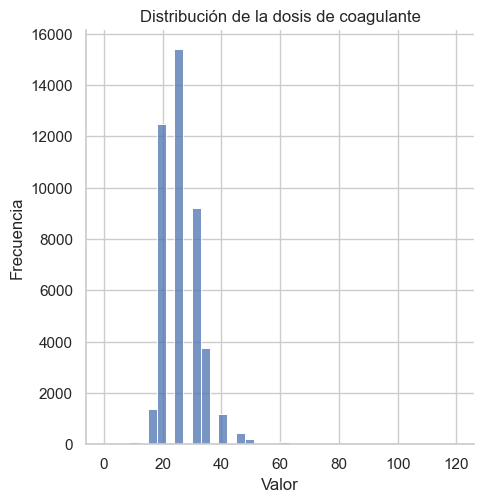

In [20]:
distribution(df)

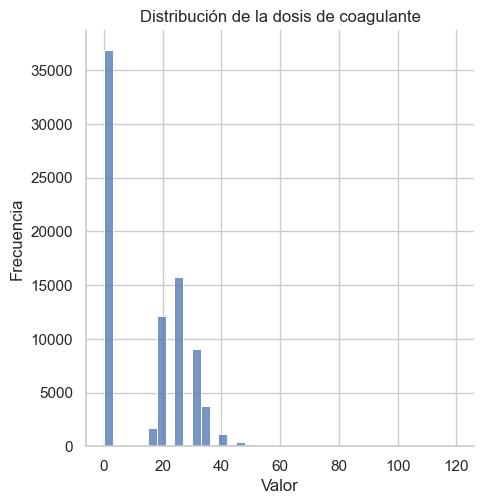

In [21]:
distribution(df_edit)

In [22]:
# Asimetría y curtosis:
print("Skewness: %f" % df['COAGULANTE_DOSIS'].skew())
print("Kurtosis: %f" % df['COAGULANTE_DOSIS'].kurt())

Skewness: 2.061153
Kurtosis: 15.133792


In [23]:
# Asimetría y curtosis:
print("Skewness: %f" % df_edit['COAGULANTE_DOSIS'].skew())
print("Kurtosis: %f" % df_edit['COAGULANTE_DOSIS'].kurt())

Skewness: 0.302531
Kurtosis: -0.669733


Al comparar estos resultados, se pueden observar diferencias significativas en la asimetría (skewness) y curtosis (kurtosis) entre los datos sin rellenar y los datos rellenados.

En los datos sin rellenar, la asimetría es de 2.061153, lo que indica una distribución con una cola más larga hacia la derecha (positivamente sesgada). La curtosis de 15.133792 sugiere una distribución más puntiaguda y con colas más pesadas que una distribución normal.

Por otro lado, en los datos rellenados, la asimetría es de 0.302531, lo que indica una distribución menos sesgada hacia la derecha y más cercana a una distribución simétrica. La curtosis de -0.669733 sugiere una distribución más achatada y con colas más ligeras en comparación con una distribución normal.

### 2. Análisis Multivariable

**Matriz de correlación (en forma de mapa de calor)**

En el siguiente análisis, evaluaremos las correlaciones entre las variables en cada uno de los dataframes con el objetivo de observar las diferencias. Hemos decidido realizar este análisis dividiendo los datos en grupos de años, ya que existen variaciones en las mediciones y prácticas a lo largo del tiempo. En los primeros años, algunas variables, como la alcalinidad y la conductividad, no se midieron. Durante los años intermedios, hubo meses en los que la aplicación de coagulante fue casi inexistente. Finalmente, en los últimos años, la aplicación de coagulante experimentó un ligero aumento debido a la instrucción dada por el ingeniero Mauricio.

**Dataframe sin relleno de datos**

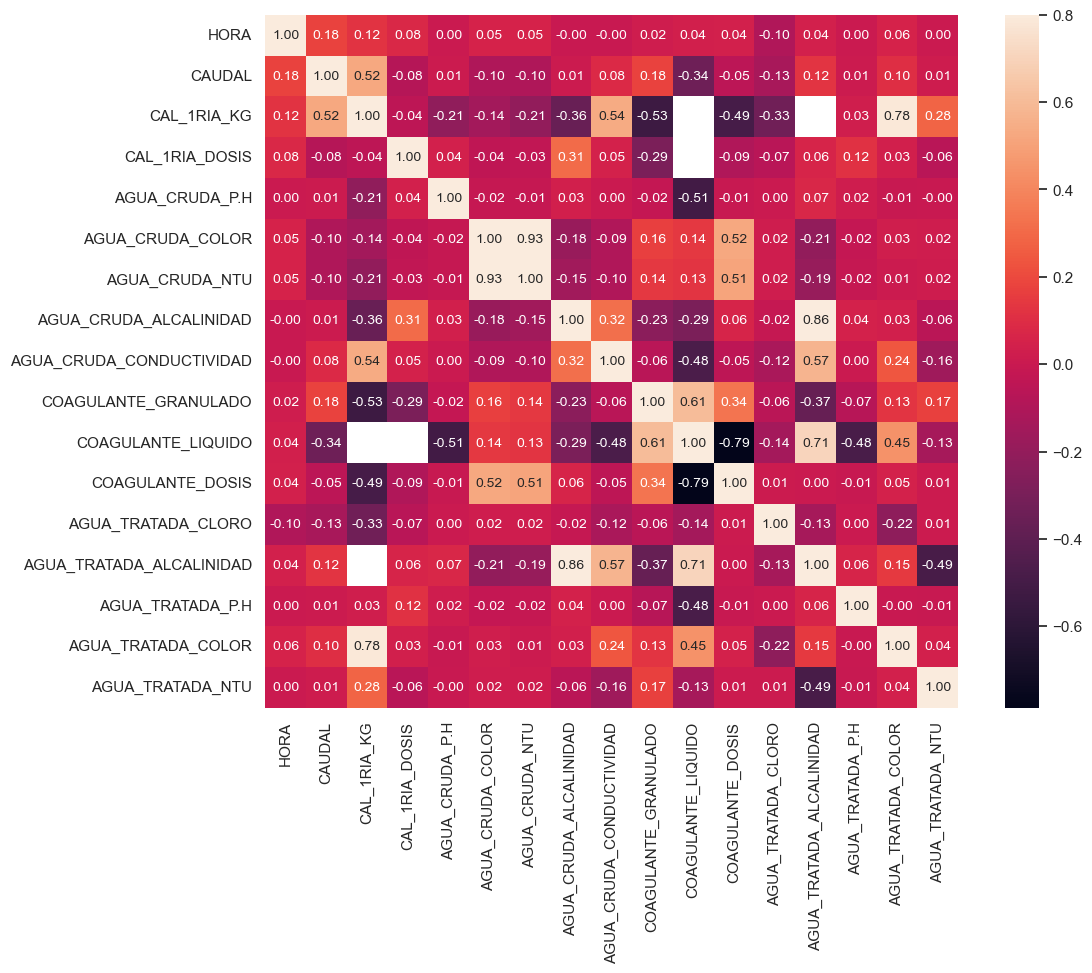

In [24]:
# Matriz de correlación:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [25]:
# Separación por grupos de años
filtro_primeros_años = df['FECHA'].dt.year.isin([2013,2014,2015])
filtro_mitad= df['FECHA'].dt.year.isin([2016, 2017, 2018, 2019])
filtro_ultimos_años = df['FECHA'].dt.year.isin([2020, 2021, 2022])

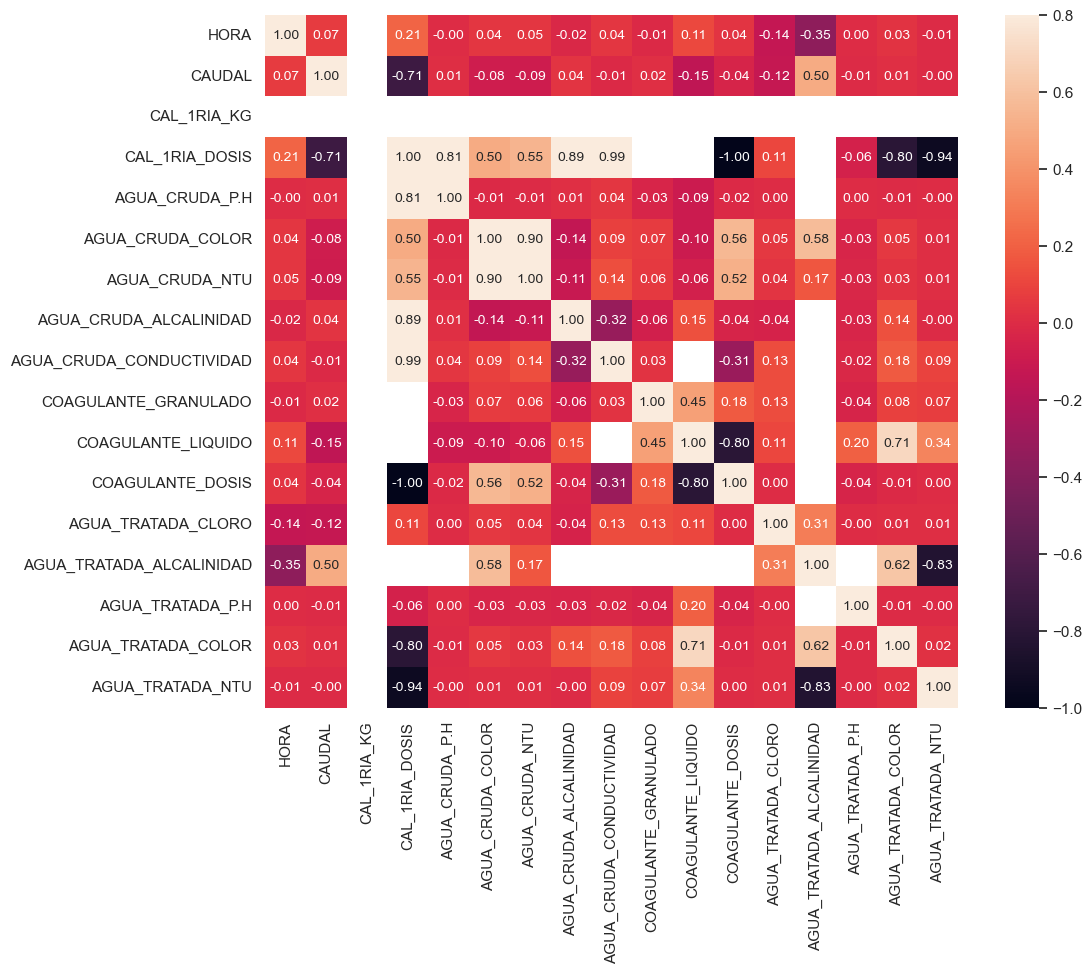

In [26]:
# Correlación primeros años
corrmat = df[filtro_primeros_años].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

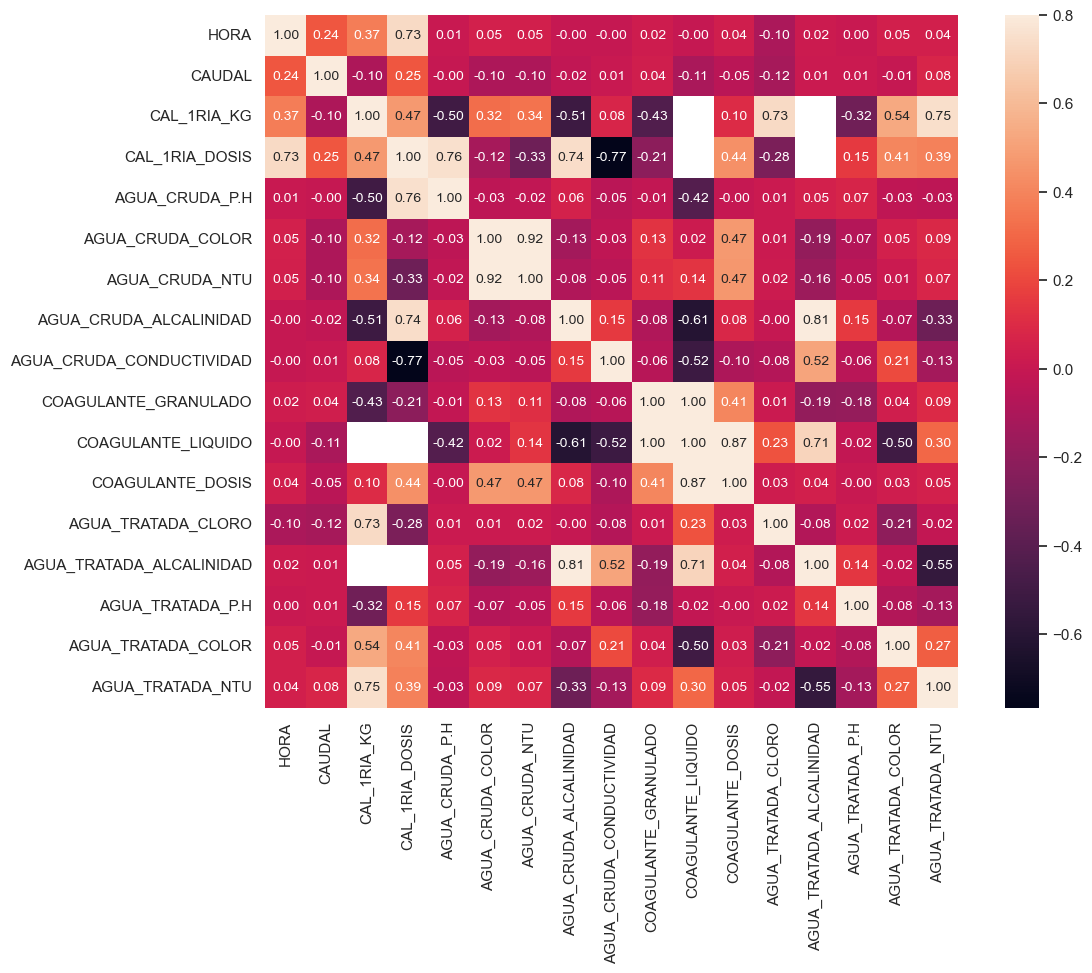

In [27]:
# Correlación años de la mitad
corrmat = df[filtro_mitad].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

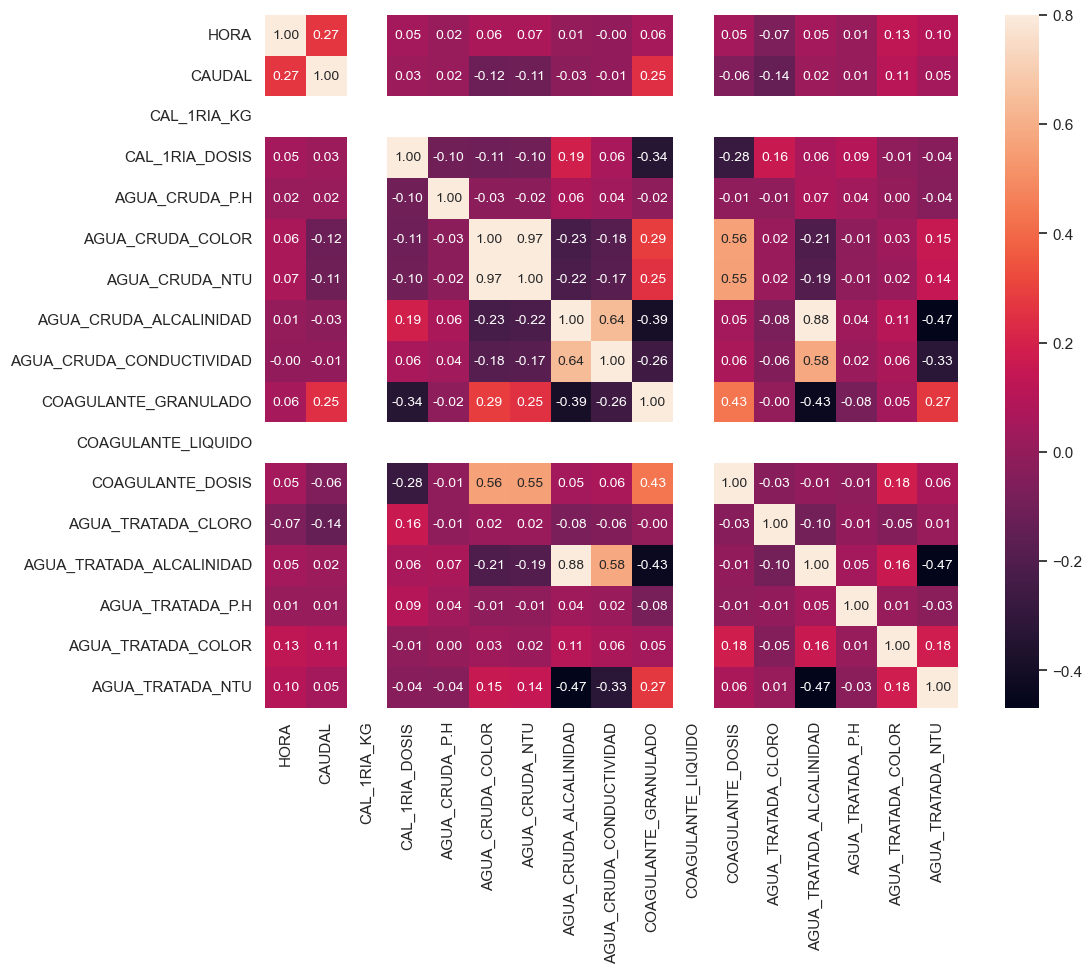

In [28]:
# Correlación últimos años
corrmat = df[filtro_ultimos_años].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

**Dataframe con relleno de datos**

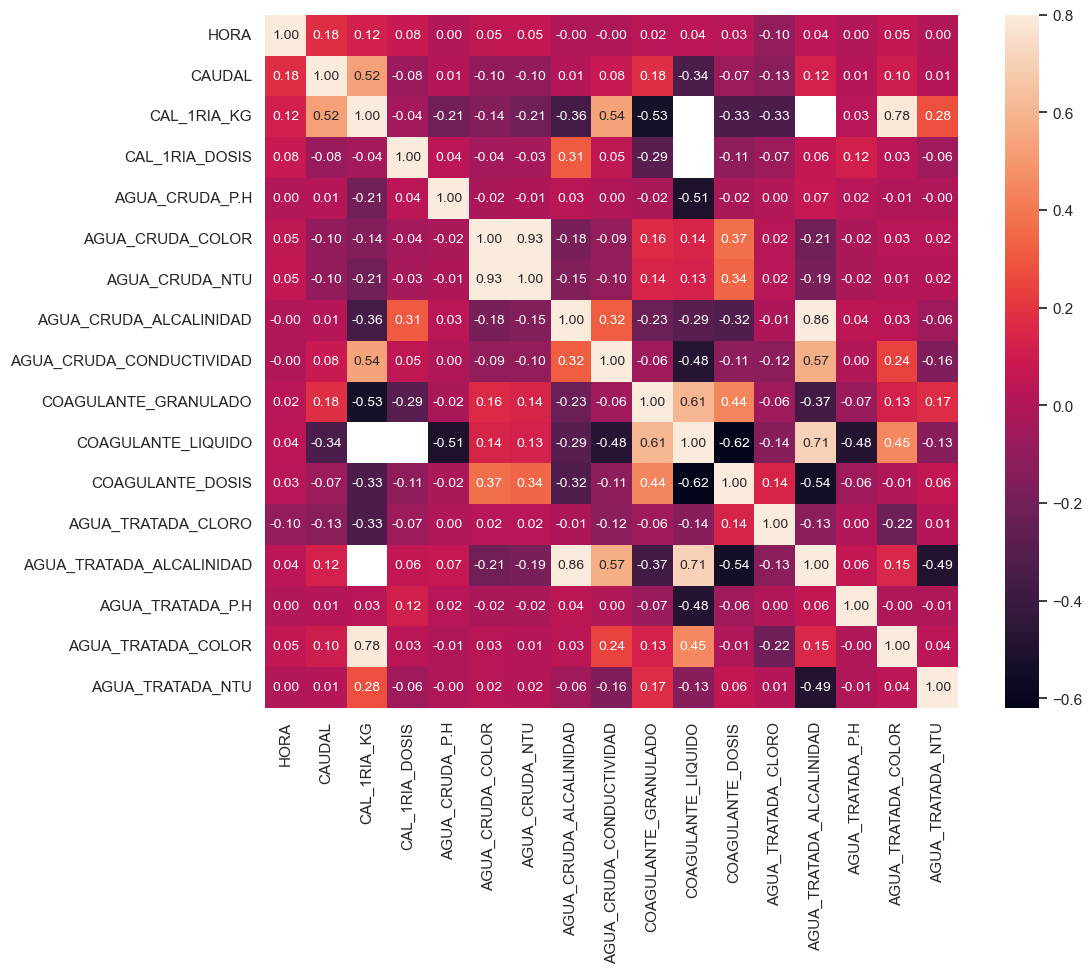

In [29]:
# Matriz de correlación:
corrmat = df_edit.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [30]:
# Separación por grupos de años
filtro_primeros_años = df_edit['FECHA'].dt.year.isin([2013,2014,2015])
filtro_mitad= df_edit['FECHA'].dt.year.isin([2016, 2017, 2018, 2019])
filtro_ultimos_años = df_edit['FECHA'].dt.year.isin([2020, 2021, 2022])

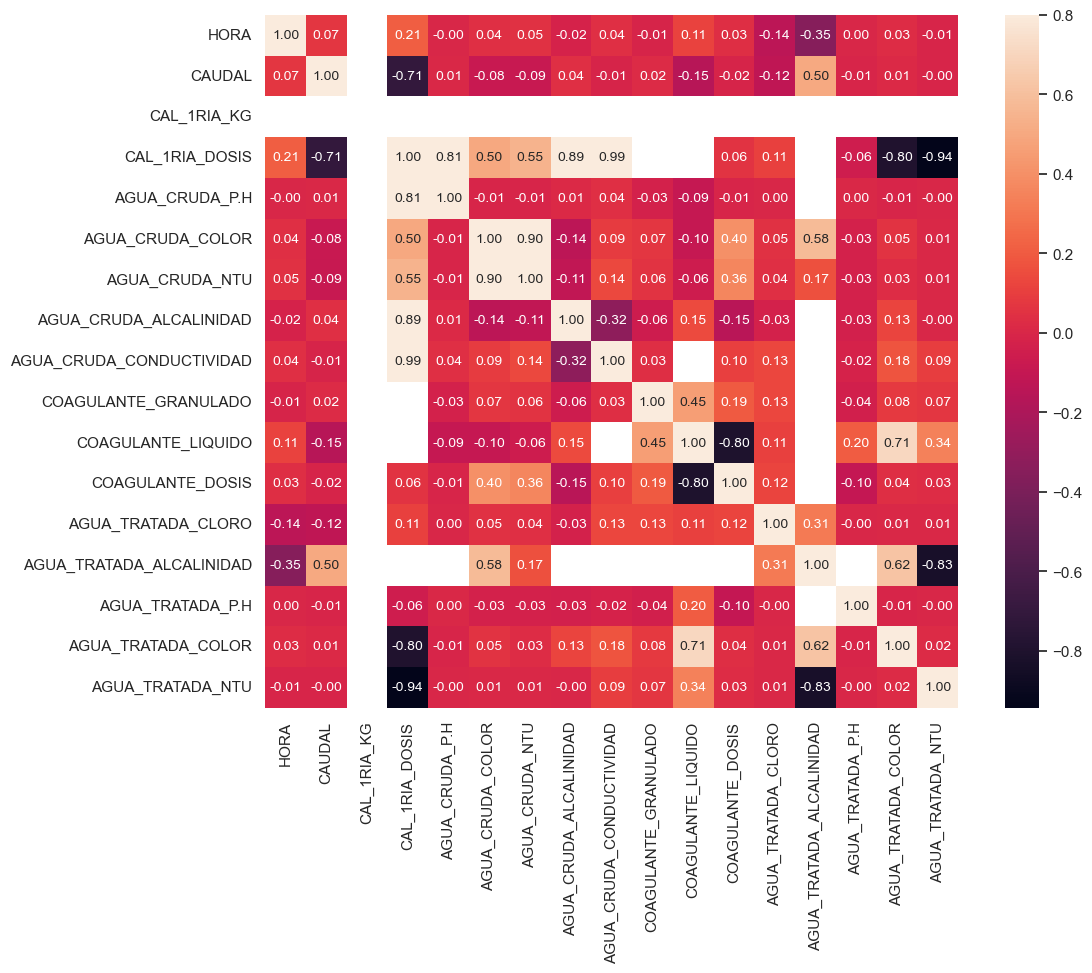

In [31]:
# Correlación primeros años
corrmat = df_edit[filtro_primeros_años].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

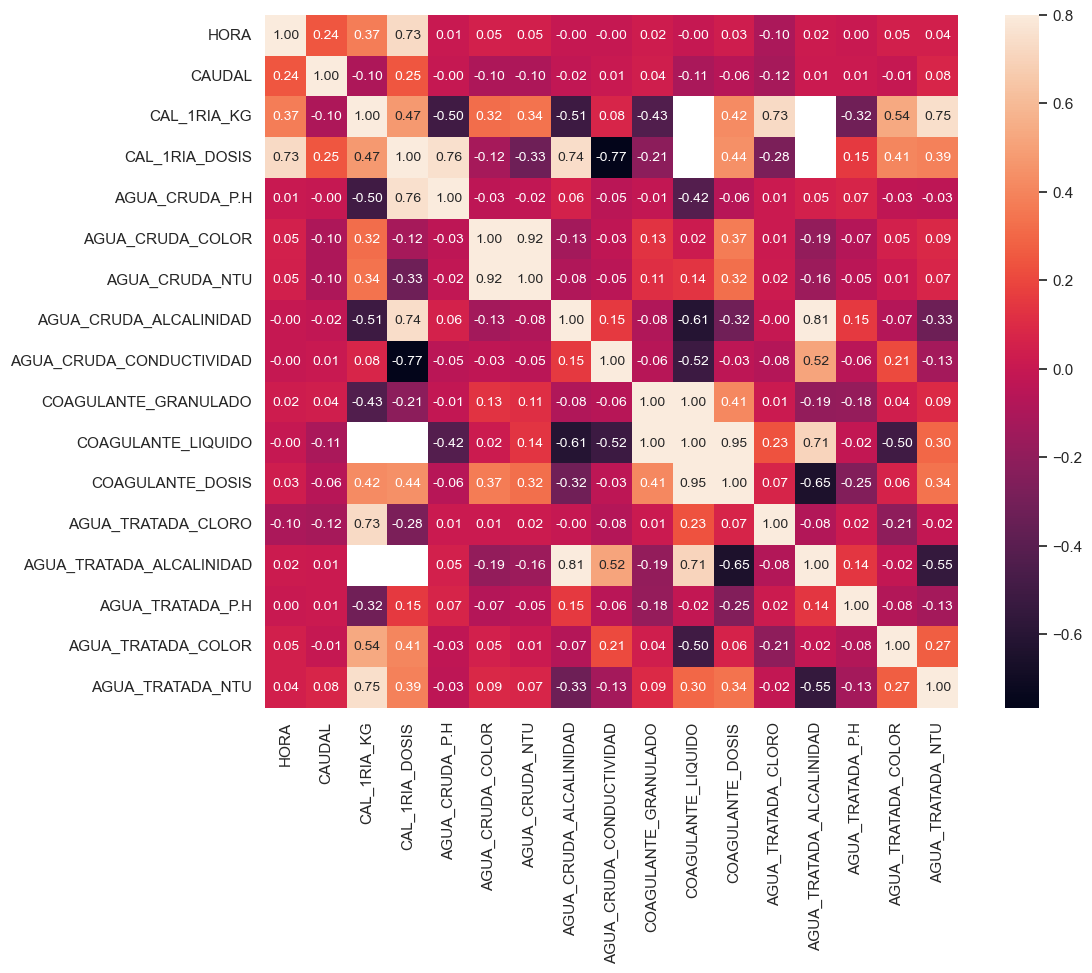

In [32]:
# Correlación años de la mitad
corrmat = df_edit[filtro_mitad].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

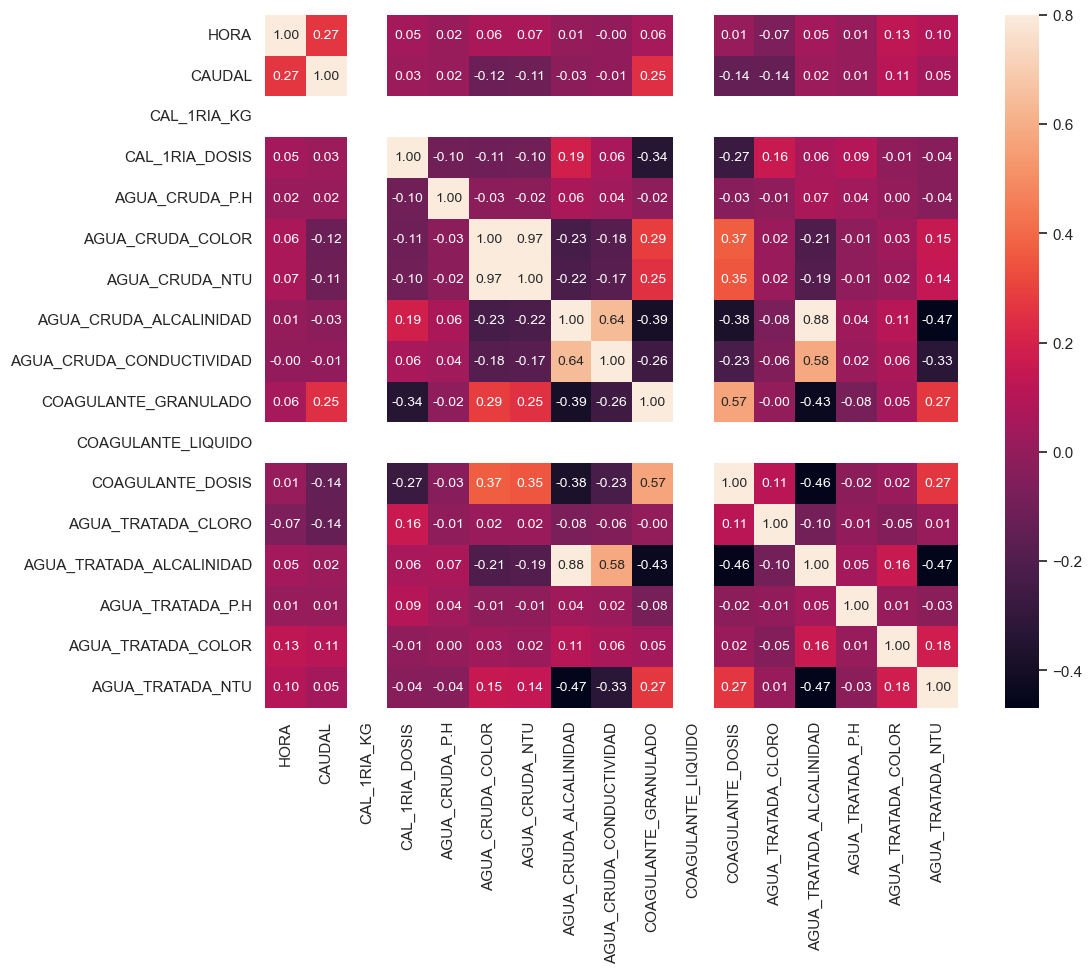

In [33]:
# Correlación últimos años
corrmat = df_edit[filtro_ultimos_años].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

La comparación entre los dos dataframes - uno sin relleno de datos y otro con relleno de datos - revela una relación interesante. En el primer caso, las variables `CAL_1RIA_KG`, `AGUA_CRUDA_COLOR`, `AGUA_CRUDA_NTU`, `COAGULANTE_GRANULADO` y `COAGULANTE_LIQUIDO` muestran correlaciones relativamente fuertes con la dosis de coagulante, lo que sugiere que estas variables pueden desempeñar un papel importante en la determinación de la dosis de coagulante. Sin embargo, estas correlaciones tienden a debilitarse cuando se rellenan los datos, lo que puede indicar que el relleno de datos puede estar introduciendo algún grado de ruido en las relaciones entre las variables.

El período de 2013 a 2015 muestra una correlación extremadamente fuerte (de -1) entre `CAL_1RIA_DOSIS` y la dosis de coagulante en el dataframe sin relleno. Esto podría indicar una posible relación inversa entre estas dos variables durante este período de tiempo. Sin embargo, en el dataframe con relleno, la correlación de estas variables es menos extrema, lo que sugiere que el relleno de datos puede estar afectando esta relación.

Durante el período 2016-2019, las correlaciones en ambos dataframes se asemejan más entre sí, pero el dataframe con relleno muestra un aumento general en las correlaciones, tanto positivas como negativas. Esto podría indicar que las relaciones entre las variables son más estables.

Finalmente, en los últimos años (2020-2022), el dataframe con relleno muestra un cambio en las correlaciones. Las correlaciones con `AGUA_CRUDA_COLOR` y `AGUA_CRUDA_NTU` disminuyen, mientras que las correlaciones con `COAGULANTE_GRANULADO` y variables como `CAUDAL`, `AGUA_CRUDA_ALCALINIDAD` y `AGUA_CRUDA_CONDUCTIVIDAD` de agua cruda aumentan. Esto podría sugerir que en los años más recientes, estos factores se han vuelto más influyentes en la determinación de la dosis de coagulante.

En general, este análisis sugiere que tanto el relleno de datos como el período de tiempo pueden tener un impacto significativo en las correlaciones entre la dosis de coagulante y otras variables. Esto tiene implicaciones importantes para cualquier intento de modelar o predecir la dosis de coagulante basándose en estas variables. Debería tenerse cuidado al rellenar los datos y al comparar las correlaciones a lo largo del tiempo, ya que ambos factores pueden introducir cambios significativos en las relaciones observadas.